# Correlation analisis
## Configuracion

In [1]:
import pandas as pd
df = pd.read_csv('Advertising_Data.csv') 

## Inspeccion inicial

In [2]:
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [3]:
df.tail()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
295,770.05,501.36,694.60,172.26,572.26,410.56,6851.0
296,512.38,250.83,373.78,366.95,987.14,509.03,6477.0
297,998.10,858.75,781.06,60.61,174.63,213.53,6949.0
298,322.35,681.22,640.29,343.65,534.22,648.71,7737.0
299,476.45,884.77,301.79,802.30,434.82,401.69,8187.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [6]:
df.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


In [8]:
df.shape

(300, 7)

## Limpieza de datos
### Datos nulos

In [9]:
df.isnull().sum()

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

### Datos anomalos

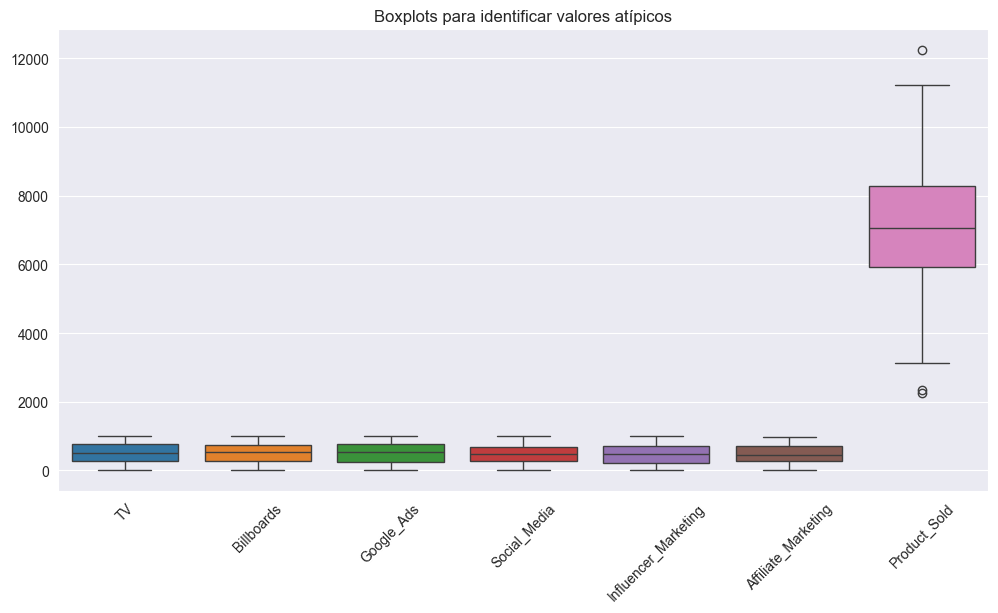

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplots para identificar valores atípicos")
plt.xticks(rotation=45)
plt.show()

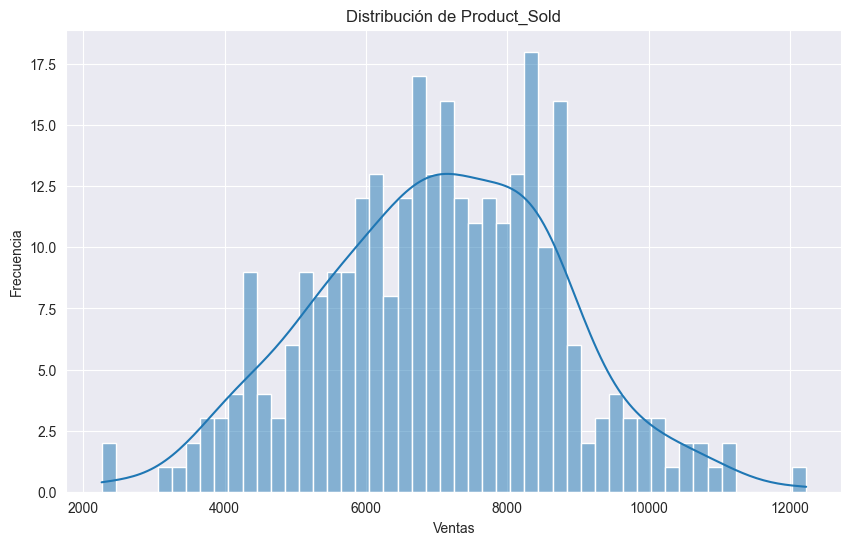

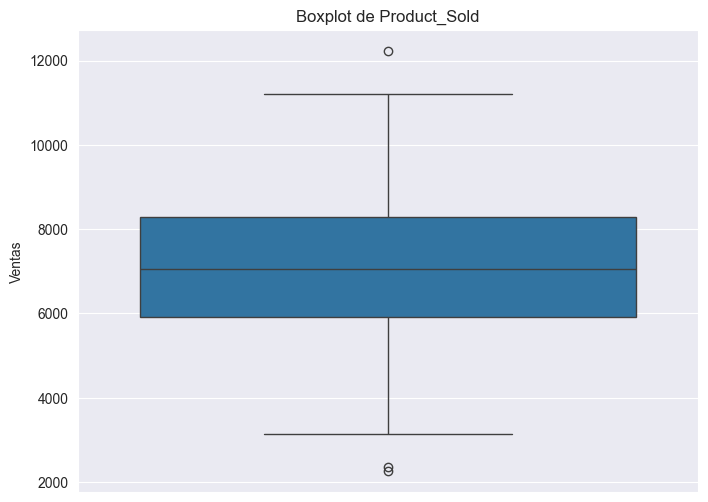

In [12]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Product_Sold'], bins=50, kde=True)
plt.title('Distribución de Product_Sold')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Product_Sold'])
plt.title('Boxplot de Product_Sold')
plt.ylabel('Ventas')
plt.show()

In [15]:
# Obtener el valor máximo
max_value = df['Product_Sold'].max()
print(f"Valor máximo de Product_Sold: {max_value}")

Valor máximo de Product_Sold: 12227.0


In [16]:
# Obtener la fila con el valor máximo
outlier_row = df[df['Product_Sold'] == max_value]
outlier_row

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
11,787.33,947.73,884.15,992.3,871.55,742.36,12227.0


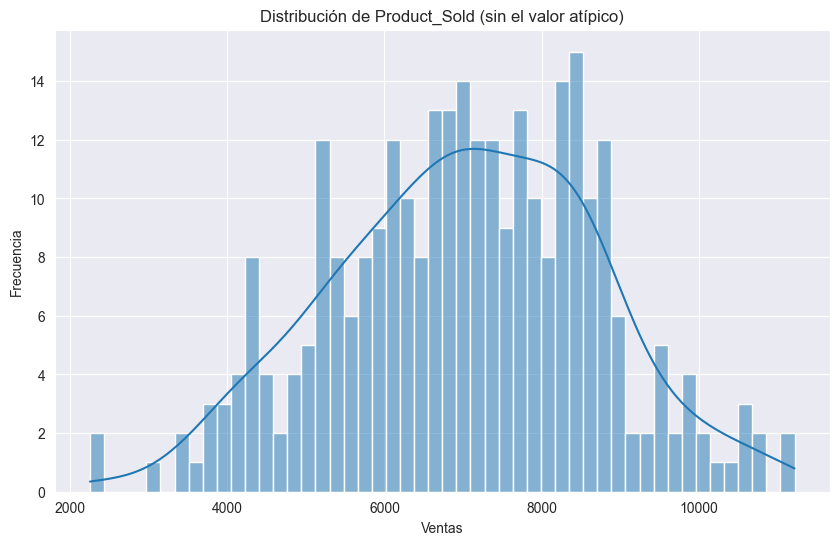

In [17]:
# Eliminar la fila con el valor atípico (si decides hacerlo)
df_no_outlier = df[df['Product_Sold'] < max_value]

# Verificar la nueva distribución (opcional)
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outlier['Product_Sold'], bins=50, kde=True)
plt.title('Distribución de Product_Sold (sin el valor atípico)')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

In [18]:
df_no_outlier.shape

(299, 7)

In [19]:
df.shape

(300, 7)

## Analisis eda

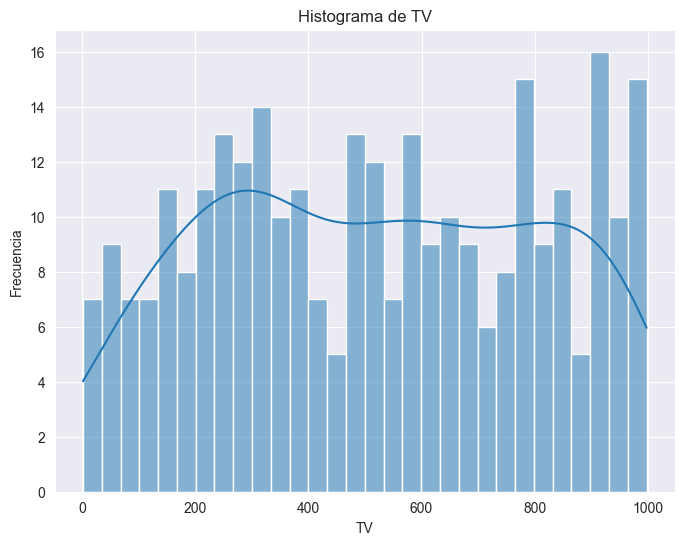

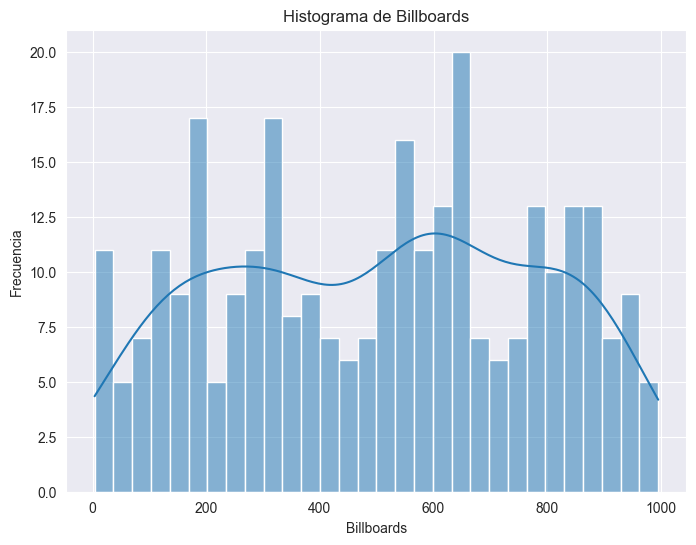

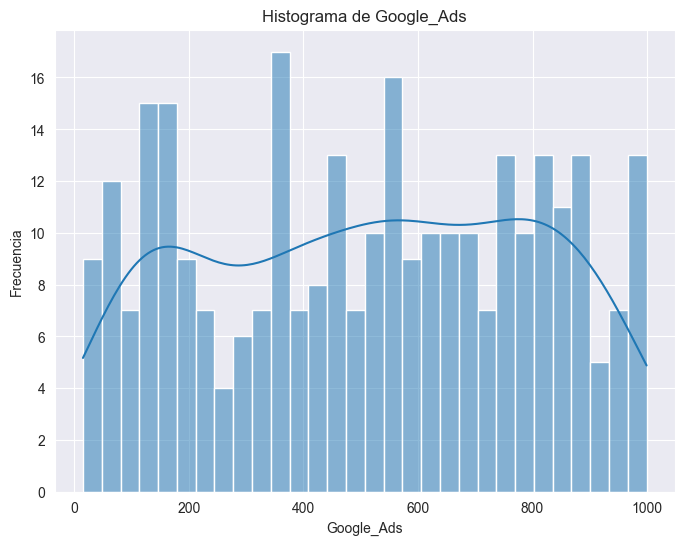

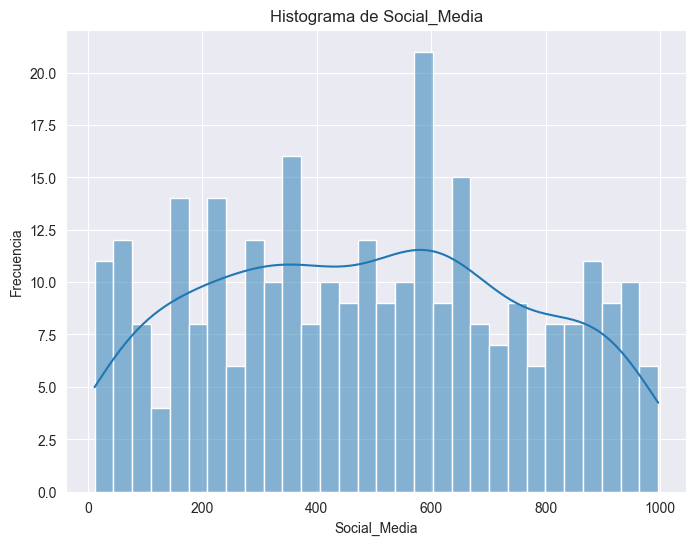

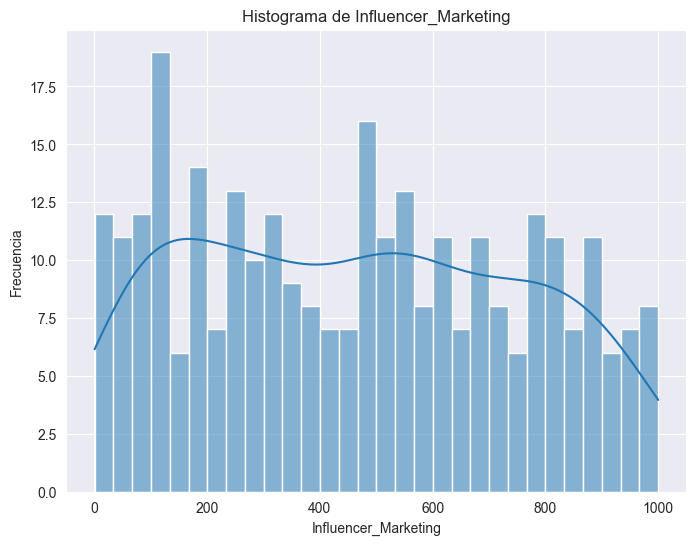

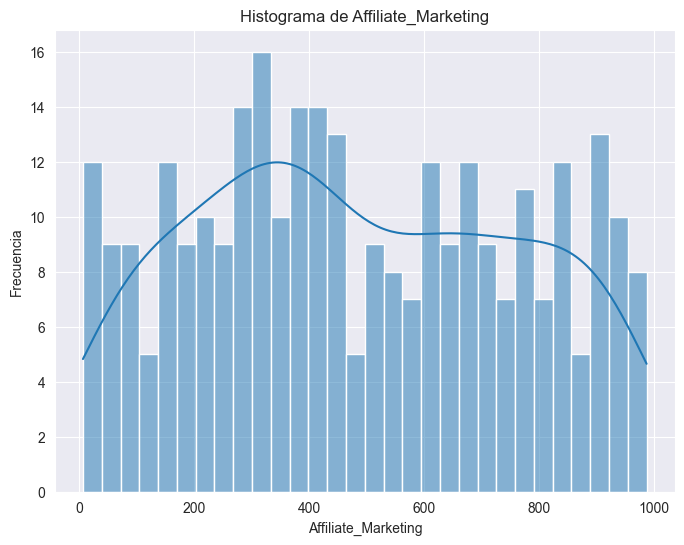

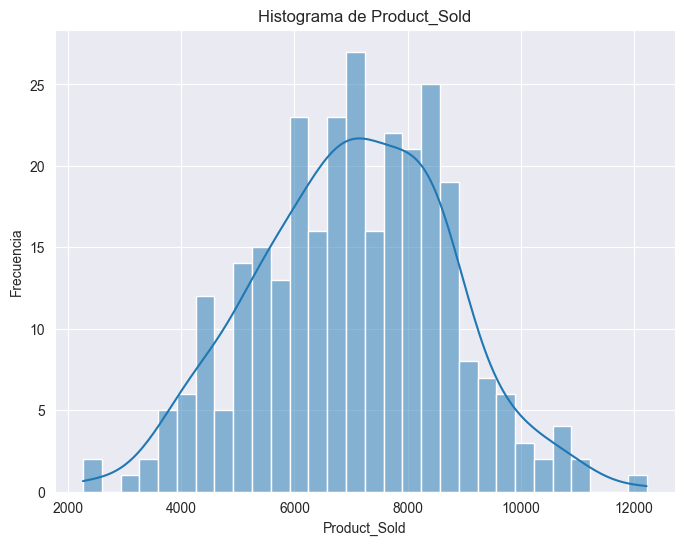

In [21]:
# Histogramas para cada variable
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


In [23]:
# Matriz de correlación
corr_matrix = df.corr()
corr_matrix

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
TV,1.000000,-0.028851,0.025265,-0.038993,0.009970,0.087524,0.374228
Billboards,-0.028851,1.000000,0.052991,0.048722,-0.005815,-0.041060,0.480593
Google_Ads,0.025265,0.052991,1.000000,0.040265,-0.059243,-0.131834,0.203678
Social_Media,-0.038993,0.048722,0.040265,1.000000,-0.042679,-0.019522,0.401088
Influencer_Marketing,0.009970,-0.005815,-0.059243,-0.042679,1.000000,-0.047093,0.140844
Affiliate_Marketing,0.087524,-0.041060,-0.131834,-0.019522,-0.047093,1.000000,0.611603
Product_Sold,0.374228,0.480593,0.203678,0.401088,0.140844,0.611603,1.000000


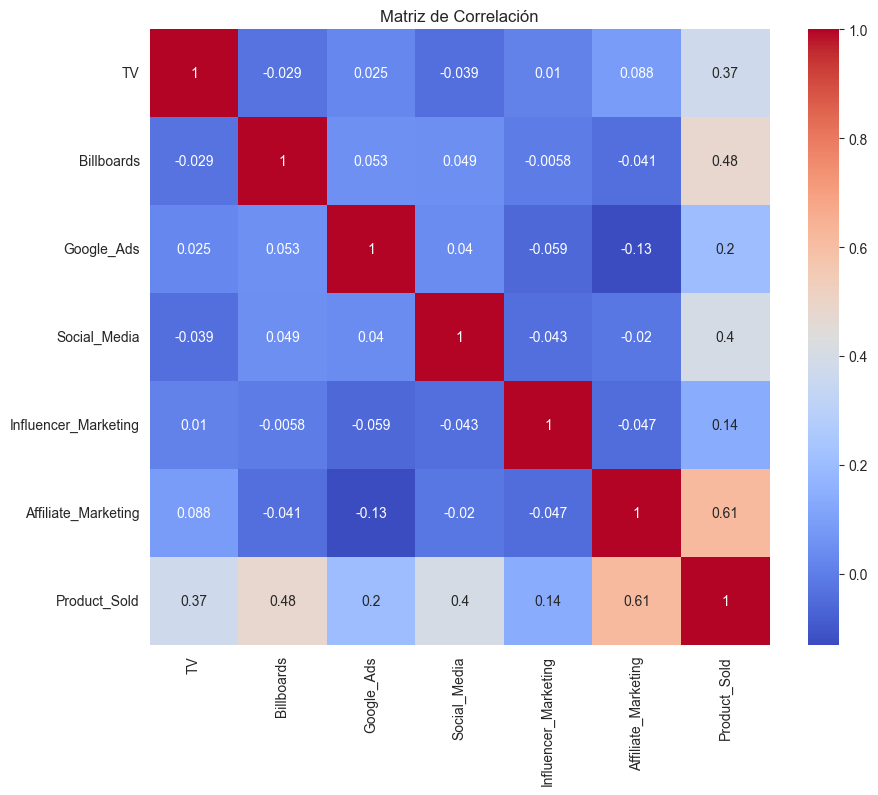

In [24]:
# Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

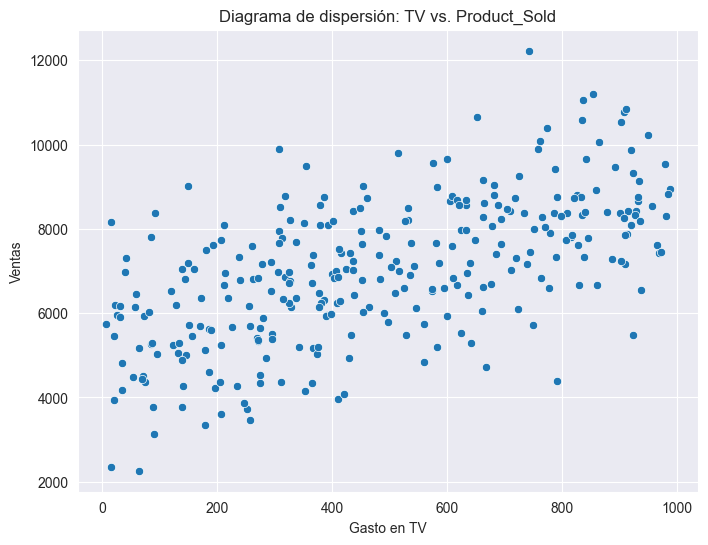

In [26]:
# Diagramas de dispersión (ejemplo con 'TV' vs. 'Product_Sold')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Affiliate_Marketing', y='Product_Sold', data=df)
plt.title('Diagrama de dispersión: TV vs. Product_Sold')
plt.xlabel('Gasto en TV')
plt.ylabel('Ventas')
plt.show()

## Conclusion
Mapa de calor:
- Correlaciones positivas: Las variables con mayor correlación positiva con Product_Sold son:
    - Affiliate_Marketing (0.61)
    - Billboards (0.48)
    - TV (0.37)
Correlaciones negativas: No hay correlaciones negativas fuertes con Product_Sold.
Diagrama de dispersión (TV vs. Product_Sold):
- Tendencia positiva: Se observa una tendencia general positiva, lo que indica que a medida que aumenta el gasto en publicidad en TV, también tienden a aumentar las ventas.
- Dispersión: La dispersión de los puntos es bastante amplia, lo que sugiere que la relación entre las variables no es perfecta y que hay otros factores que influyen en las ventas además del gasto en TV.